# GloVE

Let's work on implementation of GloVE.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## 1. Define some very simple data for understanding

In [2]:
import nltk
from nltk.corpus import brown
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
corpus = brown.sents(categories='news')

In [4]:
corpus = [sent for sent in corpus if len(sent) > 2]
corpus

[['The',
  'Fulton',
  'County',
  'Grand',
  'Jury',
  'said',
  'Friday',
  'an',
  'investigation',
  'of',
  "Atlanta's",
  'recent',
  'primary',
  'election',
  'produced',
  '``',
  'no',
  'evidence',
  "''",
  'that',
  'any',
  'irregularities',
  'took',
  'place',
  '.'],
 ['The',
  'jury',
  'further',
  'said',
  'in',
  'term-end',
  'presentments',
  'that',
  'the',
  'City',
  'Executive',
  'Committee',
  ',',
  'which',
  'had',
  'over-all',
  'charge',
  'of',
  'the',
  'election',
  ',',
  '``',
  'deserves',
  'the',
  'praise',
  'and',
  'thanks',
  'of',
  'the',
  'City',
  'of',
  'Atlanta',
  "''",
  'for',
  'the',
  'manner',
  'in',
  'which',
  'the',
  'election',
  'was',
  'conducted',
  '.'],
 ['The',
  'September-October',
  'term',
  'jury',
  'had',
  'been',
  'charged',
  'by',
  'Fulton',
  'Superior',
  'Court',
  'Judge',
  'Durwood',
  'Pye',
  'to',
  'investigate',
  'reports',
  'of',
  'possible',
  '``',
  'irregularities',
  "''",
 

In [5]:
#get word sequences and unique words
flatten = lambda l: [item for sublist in l for item in sublist]
vocab = list(set(flatten(corpus)))
vocab

['footing',
 'Mustang',
 "clients'",
 'Eaton',
 'epicure',
 'heel',
 'thousands',
 'drove',
 'regrets',
 'Denver-area',
 'blast',
 'belong',
 'firing',
 'Messrs',
 'organ',
 'dean',
 'cockpit',
 'amending',
 'drought-seared',
 'tragedies',
 'Lord',
 'rare',
 'repository',
 'cutting',
 '$67,000',
 'nondescript',
 'multi-family',
 'value',
 'bankruptcy',
 'glaze',
 'receptive',
 '2-and-2',
 'spacious',
 'praise',
 'crippling',
 "Blanchard's",
 'proposes',
 'Belgian',
 'aft',
 'McGehee',
 'Jamaican',
 'Pohl',
 'director',
 'knocks',
 'ending',
 'Peruvian',
 'Journal-American',
 'Bietnar',
 '85-student',
 'Millie',
 'solved',
 'carries',
 'food',
 'puppet',
 'Time',
 'apply',
 'lowered',
 'bicameral',
 'proportionate',
 'discriminating',
 'Unfortunately',
 'succeeded',
 '1921',
 'noble',
 'chien',
 'Locked',
 "governor's",
 'pretty',
 '$57,500',
 'Birmingham',
 'latter',
 "AID's",
 '3-month',
 'Hughes',
 'Their',
 "Molly's",
 'separated',
 'Glenda',
 'wreck',
 'stairs',
 'cuts',
 'Beatrice

In [6]:
#numericalization
word2index = {w: i for i, w in enumerate(vocab)}
print(word2index)

{'footing': 0, 'Mustang': 1, "clients'": 2, 'Eaton': 3, 'epicure': 4, 'heel': 5, 'thousands': 6, 'drove': 7, 'regrets': 8, 'Denver-area': 9, 'blast': 10, 'belong': 11, 'firing': 12, 'Messrs': 13, 'organ': 14, 'dean': 15, 'cockpit': 16, 'amending': 17, 'drought-seared': 18, 'tragedies': 19, 'Lord': 20, 'rare': 21, 'repository': 22, 'cutting': 23, '$67,000': 24, 'nondescript': 25, 'multi-family': 26, 'value': 27, 'bankruptcy': 28, 'glaze': 29, 'receptive': 30, '2-and-2': 31, 'spacious': 32, 'praise': 33, 'crippling': 34, "Blanchard's": 35, 'proposes': 36, 'Belgian': 37, 'aft': 38, 'McGehee': 39, 'Jamaican': 40, 'Pohl': 41, 'director': 42, 'knocks': 43, 'ending': 44, 'Peruvian': 45, 'Journal-American': 46, 'Bietnar': 47, '85-student': 48, 'Millie': 49, 'solved': 50, 'carries': 51, 'food': 52, 'puppet': 53, 'Time': 54, 'apply': 55, 'lowered': 56, 'bicameral': 57, 'proportionate': 58, 'discriminating': 59, 'Unfortunately': 60, 'succeeded': 61, '1921': 62, 'noble': 63, 'chien': 64, 'Locked':

In [7]:
#vocab size
voc_size = len(vocab)
print(voc_size)

14326


In [8]:
#append UNK
vocab.append('<UNK>')

In [9]:
vocab

['footing',
 'Mustang',
 "clients'",
 'Eaton',
 'epicure',
 'heel',
 'thousands',
 'drove',
 'regrets',
 'Denver-area',
 'blast',
 'belong',
 'firing',
 'Messrs',
 'organ',
 'dean',
 'cockpit',
 'amending',
 'drought-seared',
 'tragedies',
 'Lord',
 'rare',
 'repository',
 'cutting',
 '$67,000',
 'nondescript',
 'multi-family',
 'value',
 'bankruptcy',
 'glaze',
 'receptive',
 '2-and-2',
 'spacious',
 'praise',
 'crippling',
 "Blanchard's",
 'proposes',
 'Belgian',
 'aft',
 'McGehee',
 'Jamaican',
 'Pohl',
 'director',
 'knocks',
 'ending',
 'Peruvian',
 'Journal-American',
 'Bietnar',
 '85-student',
 'Millie',
 'solved',
 'carries',
 'food',
 'puppet',
 'Time',
 'apply',
 'lowered',
 'bicameral',
 'proportionate',
 'discriminating',
 'Unfortunately',
 'succeeded',
 '1921',
 'noble',
 'chien',
 'Locked',
 "governor's",
 'pretty',
 '$57,500',
 'Birmingham',
 'latter',
 "AID's",
 '3-month',
 'Hughes',
 'Their',
 "Molly's",
 'separated',
 'Glenda',
 'wreck',
 'stairs',
 'cuts',
 'Beatrice

In [10]:
word2index['<UNK>'] = 0

In [11]:
#just in case we need to use
index2word = {v:k for k, v in word2index.items()} 

## 2. Build Co-occurence Matrix X

Here, we need to count the co-occurence of two words given some window size.  We gonna use window size of 1.

In [12]:
from collections import Counter

X_i = Counter(flatten(corpus)) # X_i
X_i

Counter({'the': 5580,
         ',': 5188,
         '.': 4027,
         'of': 2849,
         'and': 2146,
         'to': 2116,
         'a': 1993,
         'in': 1893,
         'for': 943,
         'The': 803,
         'that': 802,
         '``': 732,
         'is': 732,
         'was': 717,
         "''": 700,
         'on': 657,
         'at': 598,
         'with': 545,
         'be': 526,
         'by': 497,
         'as': 481,
         'he': 451,
         'said': 402,
         'his': 399,
         'will': 389,
         'it': 363,
         'from': 344,
         'are': 328,
         ';': 314,
         'an': 300,
         'has': 300,
         '--': 300,
         'had': 279,
         'who': 268,
         'have': 265,
         'not': 254,
         'Mrs.': 253,
         'were': 252,
         'this': 250,
         'which': 244,
         'would': 244,
         'their': 219,
         'been': 212,
         'they': 205,
         'He': 191,
         'one': 184,
         'I': 179,
         'but'

In [26]:
# Make skip gram of one size window
skip_grams = []
# loop each word sequence
# we starts from 1 because 0 has no context
# we stop at second last for the same reason
for sent in corpus:
    for i in range(2, len(sent) - 1):
        target = sent[i]
        context = [sent[i - 1], sent[i + 1]]
        for w in context:
            skip_grams.append((target, w))

skip_grams

[('County', 'Fulton'),
 ('County', 'Grand'),
 ('Grand', 'County'),
 ('Grand', 'Jury'),
 ('Jury', 'Grand'),
 ('Jury', 'said'),
 ('said', 'Jury'),
 ('said', 'Friday'),
 ('Friday', 'said'),
 ('Friday', 'an'),
 ('an', 'Friday'),
 ('an', 'investigation'),
 ('investigation', 'an'),
 ('investigation', 'of'),
 ('of', 'investigation'),
 ('of', "Atlanta's"),
 ("Atlanta's", 'of'),
 ("Atlanta's", 'recent'),
 ('recent', "Atlanta's"),
 ('recent', 'primary'),
 ('primary', 'recent'),
 ('primary', 'election'),
 ('election', 'primary'),
 ('election', 'produced'),
 ('produced', 'election'),
 ('produced', '``'),
 ('``', 'produced'),
 ('``', 'no'),
 ('no', '``'),
 ('no', 'evidence'),
 ('evidence', 'no'),
 ('evidence', "''"),
 ("''", 'evidence'),
 ("''", 'that'),
 ('that', "''"),
 ('that', 'any'),
 ('any', 'that'),
 ('any', 'irregularities'),
 ('irregularities', 'any'),
 ('irregularities', 'took'),
 ('took', 'irregularities'),
 ('took', 'place'),
 ('place', 'took'),
 ('place', '.'),
 ('further', 'jury'),
 (

In [27]:
X_ik_skipgram = Counter(skip_grams) # Co-occurece in window size 1
X_ik_skipgram

Counter({('the', 'of'): 844,
         ('of', 'the'): 805,
         ('the', 'in'): 549,
         ('in', 'the'): 542,
         ('and', ','): 390,
         (',', 'and'): 389,
         ('the', ','): 364,
         (',', 'the'): 339,
         ("''", '.'): 293,
         ('the', 'to'): 273,
         ('to', 'the'): 268,
         ('the', 'on'): 239,
         ('on', 'the'): 236,
         ('the', 'for'): 217,
         ('for', 'the'): 214,
         ("''", ','): 198,
         (',', "''"): 198,
         ('the', 'at'): 179,
         ('at', 'the'): 177,
         ('be', 'will'): 157,
         (';', ';'): 157,
         ('the', 'that'): 146,
         ('that', 'the'): 145,
         ('and', 'the'): 136,
         ('the', 'and'): 136,
         ('will', 'be'): 136,
         ('the', 'with'): 135,
         ('with', 'the'): 131,
         ('who', ','): 126,
         (',', 'said'): 122,
         ('he', ','): 122,
         ('a', ','): 121,
         ('said', ','): 117,
         ('in', 'a'): 117,
         ('a', 'in'):

### Weighting function

GloVe includes a weighting function to scale down too frequent words.

<img src = "figures/glove_weighting_func.png" width=400>

In [28]:
#simply a normalized function...don't worry too much
def weighting(w_i, w_j, X_ik):
        
    #check whether the co-occurrences exist between these two words
    try:
        x_ij = X_ik[(w_i, w_j)]
    except:
        x_ij = 1  #if does not exist, set it to 1
                
    x_max = 100 #100 # fixed in paper  #cannot exceed 100 counts
    alpha = 0.75
    
    #if co-occurrence does not exceed 100, scale it based on some alpha
    if x_ij < x_max:
        result = (x_ij/x_max)**alpha  #scale it
    else:
        result = 1  #if is greater than max, set it to 1 maximum
    
    return result

The MemoryError occurs because you are generating all possible combinations of pairs in vocab using combinations_with_replacement. For large vocabularies, the number of pairs grows quadratically, making it infeasible to handle in memory. 

In [36]:
from itertools import combinations_with_replacement


X_ik = {}  # for keeping the co-occurrences
weighting_dic = {}  # scaling the percentage of sampling

for bigram in combinations_with_replacement(vocab, 2):
    if bigram in X_ik_skipgram:  # matches
        co_occur = X_ik_skipgram[bigram]  # get the count from what we already counted
        X_ik[bigram] = co_occur + 1  # +1 for stability issue
        X_ik[(bigram[1], bigram[0])] = co_occur + 1  # count also for the opposite

        weighting_dic[bigram] = weighting(bigram[0], bigram[1], X_ik)
        weighting_dic[(bigram[1], bigram[0])] = weighting(bigram[1], bigram[0], X_ik)

print(f"{X_ik=}")
print(f"{weighting_dic=}")


X_ik={('footing', 'the'): 2, ('the', 'footing'): 2, ('footing', 'was'): 2, ('was', 'footing'): 2, ('Mustang', 'the'): 2, ('the', 'Mustang'): 2, ('Mustang', '21'): 2, ('21', 'Mustang'): 2, ("clients'", 'guilt'): 2, ('guilt', "clients'"): 2, ("clients'", 'their'): 2, ('their', "clients'"): 2, ('Eaton', 'of'): 2, ('of', 'Eaton'): 2, ('Eaton', 'Earl'): 2, ('Earl', 'Eaton'): 2, ('epicure', 'incorrigible'): 2, ('incorrigible', 'epicure'): 2, ('epicure', ','): 2, (',', 'epicure'): 2, ('heel', 'his'): 2, ('his', 'heel'): 2, ('heel', '.'): 2, ('.', 'heel'): 2, ('thousands', 'the'): 2, ('the', 'thousands'): 2, ('thousands', 'of'): 11, ('of', 'thousands'): 11, ('thousands', 'for'): 2, ('for', 'thousands'): 2, ('thousands', 'handled'): 2, ('handled', 'thousands'): 2, ('thousands', 'entertain'): 2, ('entertain', 'thousands'): 2, ('drove', 'a'): 2, ('a', 'drove'): 2, ('drove', ','): 3, (',', 'drove'): 3, ('drove', 'in'): 4, ('in', 'drove'): 4, ('drove', 'and'): 2, ('and', 'drove'): 2, ('drove', 'I')

In [38]:
X_ik

{('footing', 'the'): 2,
 ('the', 'footing'): 2,
 ('footing', 'was'): 2,
 ('was', 'footing'): 2,
 ('Mustang', 'the'): 2,
 ('the', 'Mustang'): 2,
 ('Mustang', '21'): 2,
 ('21', 'Mustang'): 2,
 ("clients'", 'guilt'): 2,
 ('guilt', "clients'"): 2,
 ("clients'", 'their'): 2,
 ('their', "clients'"): 2,
 ('Eaton', 'of'): 2,
 ('of', 'Eaton'): 2,
 ('Eaton', 'Earl'): 2,
 ('Earl', 'Eaton'): 2,
 ('epicure', 'incorrigible'): 2,
 ('incorrigible', 'epicure'): 2,
 ('epicure', ','): 2,
 (',', 'epicure'): 2,
 ('heel', 'his'): 2,
 ('his', 'heel'): 2,
 ('heel', '.'): 2,
 ('.', 'heel'): 2,
 ('thousands', 'the'): 2,
 ('the', 'thousands'): 2,
 ('thousands', 'of'): 11,
 ('of', 'thousands'): 11,
 ('thousands', 'for'): 2,
 ('for', 'thousands'): 2,
 ('thousands', 'handled'): 2,
 ('handled', 'thousands'): 2,
 ('thousands', 'entertain'): 2,
 ('entertain', 'thousands'): 2,
 ('drove', 'a'): 2,
 ('a', 'drove'): 2,
 ('drove', ','): 3,
 (',', 'drove'): 3,
 ('drove', 'in'): 4,
 ('in', 'drove'): 4,
 ('drove', 'and'): 2,


In [39]:
weighting_dic

{('footing', 'the'): 1,
 ('the', 'footing'): 1,
 ('footing', 'was'): 1,
 ('was', 'footing'): 1,
 ('Mustang', 'the'): 1,
 ('the', 'Mustang'): 1,
 ('Mustang', '21'): 1,
 ('21', 'Mustang'): 1,
 ("clients'", 'guilt'): 1,
 ('guilt', "clients'"): 1,
 ("clients'", 'their'): 1,
 ('their', "clients'"): 1,
 ('Eaton', 'of'): 1,
 ('of', 'Eaton'): 1,
 ('Eaton', 'Earl'): 1,
 ('Earl', 'Eaton'): 1,
 ('epicure', 'incorrigible'): 1,
 ('incorrigible', 'epicure'): 1,
 ('epicure', ','): 1,
 (',', 'epicure'): 1,
 ('heel', 'his'): 1,
 ('his', 'heel'): 1,
 ('heel', '.'): 1,
 ('.', 'heel'): 1,
 ('thousands', 'the'): 1,
 ('the', 'thousands'): 1,
 ('thousands', 'of'): 1,
 ('of', 'thousands'): 1,
 ('thousands', 'for'): 1,
 ('for', 'thousands'): 1,
 ('thousands', 'handled'): 1,
 ('handled', 'thousands'): 1,
 ('thousands', 'entertain'): 1,
 ('entertain', 'thousands'): 1,
 ('drove', 'a'): 1,
 ('a', 'drove'): 1,
 ('drove', ','): 1,
 (',', 'drove'): 1,
 ('drove', 'in'): 1,
 ('in', 'drove'): 1,
 ('drove', 'and'): 1,
 (

## 3. Prepare train data

In [37]:
for c in corpus:
    print(c)

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']
['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']
['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', '.']
['``', 'Only', 'a', 'relative', 'handful', 'of', 'such', 'reports

In [46]:
import numpy as np
import math

def random_batch(batch_size, word_sequence, skip_grams, X_ik, weighting_dic, window_size=2):
    """
    Generate a random batch of inputs, labels, co-occurrences, and weightings.
    
    Parameters:
        batch_size (int): Size of the batch to generate.
        word_sequence (list): The list of words in the sequence.
        skip_grams (list): List of (target, context) pairs.
        X_ik (dict): Dictionary of co-occurrences.
        weighting_dic (dict): Dictionary of weightings.
        word2index (dict): Mapping of words to indices.
        window_size (int): Size of the context window. Default is 2.
    
    Returns:
        np.array: Inputs (target words).
        np.array: Labels (context words).
        np.array: Co-occurrences (log-scaled).
        np.array: Weightings.
    """
    # Generate skip-grams dynamically based on the window size
    dynamic_skip_grams = []
    for sent in word_sequence:
        for i in range(window_size, len(sent) - window_size):
            target = sent[i]
            context = sent[i - window_size:i] + sent[i + 1:i + 1 + window_size]
            for ctx in context:
                dynamic_skip_grams.append((target, ctx))
    
    # Convert dynamic skip-grams to indices
    dynamic_skip_grams_id = [(word2index[skip_gram[0]], word2index[skip_gram[1]]) for skip_gram in dynamic_skip_grams]
    
    random_inputs = []
    random_labels = []
    random_coocs = []
    random_weightings = []
    random_index = np.random.choice(range(len(dynamic_skip_grams_id)), batch_size, replace=False)  # Random sampling
    
    for i in random_index:
        random_inputs.append([dynamic_skip_grams_id[i][0]])  # Target word ID
        random_labels.append([dynamic_skip_grams_id[i][1]])  # Context word ID
        
        # Get co-occurrence
        pair = dynamic_skip_grams[i]
        cooc = X_ik.get(pair, 1)  # Default to 1 if not found
        random_coocs.append([math.log(cooc)])
        
        # Get weighting
        weighting = weighting_dic.get(pair, 1.0)  # Default to 1.0 if not found
        random_weightings.append([weighting])
                    
    return np.array(random_inputs), np.array(random_labels), np.array(random_coocs), np.array(random_weightings)


### Testing the method

In [48]:
#testing the method
batch_size = 128 # mini-batch size
window_size = 3
input_batch, target_batch, cooc_batch, weighting_batch = random_batch(batch_size, corpus, skip_grams, X_ik, weighting_dic, window_size )

print("Input: ", input_batch)
print("Target: ", target_batch)
print("Cooc: ", cooc_batch)
print("Weighting: ", weighting_batch)
print("Window size: ", window_size)

#we will convert them to tensor during training, so don't worry...

Input:  [[ 1126]
 [13429]
 [11872]
 [ 5767]
 [ 8090]
 [ 1126]
 [ 1865]
 [ 2706]
 [ 2144]
 [ 5003]
 [ 8856]
 [ 3910]
 [ 5194]
 [ 4802]
 [ 4897]
 [ 9909]
 [ 6860]
 [11479]
 [ 2653]
 [ 2103]
 [ 4214]
 [ 5767]
 [ 5628]
 [ 2043]
 [ 2887]
 [ 1483]
 [  506]
 [ 1865]
 [  931]
 [ 2887]
 [ 8090]
 [  785]
 [ 5013]
 [  431]
 [ 6804]
 [ 2469]
 [ 8107]
 [ 5767]
 [13914]
 [12672]
 [13906]
 [ 4751]
 [ 5995]
 [13714]
 [ 5589]
 [ 8090]
 [11106]
 [13721]
 [10779]
 [ 6442]
 [12448]
 [ 1126]
 [  250]
 [ 6331]
 [ 1126]
 [ 4125]
 [ 8238]
 [ 2653]
 [ 7701]
 [ 7903]
 [ 6328]
 [ 6077]
 [10483]
 [ 1126]
 [ 3758]
 [13771]
 [ 1865]
 [ 6643]
 [ 1126]
 [ 1157]
 [11591]
 [ 1091]
 [ 7911]
 [ 5628]
 [ 6805]
 [ 1126]
 [ 1126]
 [ 5397]
 [ 3254]
 [ 8723]
 [ 6670]
 [ 8090]
 [11793]
 [ 7903]
 [ 2706]
 [ 6865]
 [ 4214]
 [ 4562]
 [ 1126]
 [ 1865]
 [ 5589]
 [ 9733]
 [ 5383]
 [ 9784]
 [11872]
 [ 4449]
 [ 7298]
 [13991]
 [ 4214]
 [ 6877]
 [ 2653]
 [ 6265]
 [ 6331]
 [ 6907]
 [ 6843]
 [ 9251]
 [ 1865]
 [ 1126]
 [ 5767]
 [12448]
 [

## 4. Model

<img src ="figures/glove.png">

In [49]:
class GloVe(nn.Module):
    
    def __init__(self, vocab_size,embed_size):
        super(GloVe,self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, embed_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, embed_size) # out embedding
        
        self.v_bias = nn.Embedding(vocab_size, 1)
        self.u_bias = nn.Embedding(vocab_size, 1)
        
    def forward(self, center_words, target_words, coocs, weighting):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        
        center_bias = self.v_bias(center_words).squeeze(1)
        target_bias = self.u_bias(target_words).squeeze(1)
        
        inner_product = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        #note that coocs already got log
        loss = weighting*torch.pow(inner_product +center_bias + target_bias - coocs, 2)
        
        return torch.sum(loss)

## 5. Training

In [51]:
batch_size     = 128 # mini-batch size
embedding_size = 2 #so we can later plot
model          = GloVe(voc_size, embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [52]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [53]:
import time

# Training
num_epochs = 500
print(f"Training model with window size: {window_size}\n")    
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch, cooc_batch, weighting_batch = random_batch(batch_size, corpus, skip_grams, X_ik, weighting_dic)
    input_batch  = torch.LongTensor(input_batch)         #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch)        #[batch_size, 1]
    cooc_batch   = torch.FloatTensor(cooc_batch)         #[batch_size, 1]
    weighting_batch = torch.FloatTensor(weighting_batch) #[batch_size, 1]
    
    optimizer.zero_grad()
    loss = model(input_batch, target_batch, cooc_batch, weighting_batch)
    
    loss.backward()
    optimizer.step()
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")


Training model with window size: 3

Epoch: 100 | cost: 759.901062 | time: 0m 0s
Epoch: 200 | cost: 689.269531 | time: 0m 0s
Epoch: 300 | cost: 492.643494 | time: 0m 0s
Epoch: 400 | cost: 723.498413 | time: 0m 0s
Epoch: 500 | cost: 603.422852 | time: 0m 0s


## 6. Plotting the embeddings

In [54]:
#list of vocabs
vocab[:10]

['footing',
 'Mustang',
 "clients'",
 'Eaton',
 'epicure',
 'heel',
 'thousands',
 'drove',
 'regrets',
 'Denver-area']

In [55]:
word = vocab[0]

In [56]:
#numericalization
id = word2index[word]
id

0

In [57]:
id_tensor = torch.LongTensor([id])
id_tensor

tensor([0])

In [58]:
#get the embedding by averaging
v_embed = model.embedding_v(id_tensor)
u_embed = model.embedding_u(id_tensor)

v_embed, u_embed

(tensor([[0.2482, 1.4963]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.8491, -0.6454]], grad_fn=<EmbeddingBackward0>))

In [59]:
#average to get the word embedding
word_embed = (v_embed + u_embed) / 2
word_embed[0][1]

tensor(0.4255, grad_fn=<SelectBackward0>)

In [60]:
#let's write a function to get embedding given a word
def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

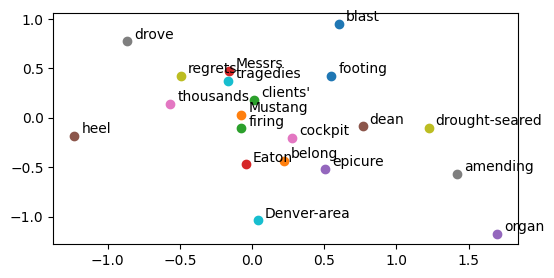

In [61]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## 7. Cosine similarity

Formally the [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity) $s$ between two vectors $p$ and $q$ is defined as:

$$s = \frac{p \cdot q}{||p|| ||q||}, \textrm{ where } s \in [-1, 1] $$ 

If $p$ and $q$ is super similar, the result is 1 otherwise 0.

In [62]:
vocab

['footing',
 'Mustang',
 "clients'",
 'Eaton',
 'epicure',
 'heel',
 'thousands',
 'drove',
 'regrets',
 'Denver-area',
 'blast',
 'belong',
 'firing',
 'Messrs',
 'organ',
 'dean',
 'cockpit',
 'amending',
 'drought-seared',
 'tragedies',
 'Lord',
 'rare',
 'repository',
 'cutting',
 '$67,000',
 'nondescript',
 'multi-family',
 'value',
 'bankruptcy',
 'glaze',
 'receptive',
 '2-and-2',
 'spacious',
 'praise',
 'crippling',
 "Blanchard's",
 'proposes',
 'Belgian',
 'aft',
 'McGehee',
 'Jamaican',
 'Pohl',
 'director',
 'knocks',
 'ending',
 'Peruvian',
 'Journal-American',
 'Bietnar',
 '85-student',
 'Millie',
 'solved',
 'carries',
 'food',
 'puppet',
 'Time',
 'apply',
 'lowered',
 'bicameral',
 'proportionate',
 'discriminating',
 'Unfortunately',
 'succeeded',
 '1921',
 'noble',
 'chien',
 'Locked',
 "governor's",
 'pretty',
 '$57,500',
 'Birmingham',
 'latter',
 "AID's",
 '3-month',
 'Hughes',
 'Their',
 "Molly's",
 'separated',
 'Glenda',
 'wreck',
 'stairs',
 'cuts',
 'Beatrice

In [64]:
#let's try similarity between first and second, and second and third
cockpit          = get_embed('cockpit')
control        = get_embed('control')
members       = get_embed('members')

In [66]:
#numpy version
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim
    
print(f"cockpit vs. control: ",        cos_sim(cockpit, control))
print(f"cockpit vs. members: ",       cos_sim(cockpit, members))
print(f"cockpit vs. cockpit: ",          cos_sim(cockpit, cockpit))

cockpit vs. control:  -0.8046385482679457
cockpit vs. members:  0.9605582655669828
cockpit vs. cockpit:  0.9999999999999999


In [34]:
#scipy version
from scipy import spatial

def cos_sim(a, b):
    cos_sim = 1 - spatial.distance.cosine(a, b)  #distance = 1 - similarlity, because scipy only gives distance
    return cos_sim

print(f"cat vs. fruit: ",     cos_sim(cat, fruit))
print(f"cat vs. animal: ",       cos_sim(cat, animal))
print(f"cat vs. cat: ",          cos_sim(cat, cat))

cat vs. fruit:  0.4297538348963392
cat vs. animal:  -0.06819172453918743
cat vs. cat:  1
